In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import time 
import matplotlib.pyplot as plt

In [2]:
# Load the datasetata = "usedcars.csv"
train_data = 'test_data.csv'
train = pd.read_csv(train_data)

test_data = 'test_data.csv'
test = pd.read_csv(test_data)

In [3]:
X_train = train.drop(['price'], axis=1)
y_train = train['price']
X_test = test.drop(['price'], axis=1)
y_test = test['price']

In [4]:
# Polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(5), LinearRegression())
start_poly = time.time()
poly_reg.fit(X_train, y_train)
stop_poly = time.time()
y_pred_poly = poly_reg.predict(X_test)

print(stop_poly - start_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

# Print the results
print("\nPolynomial regression:")
print(f"MSE: {mse_poly:.2f}, RMSE: {rmse_poly:.2f}, R-squared: {r2_poly:.2f}, MAE: {mae_poly:.2f}")

0.2262876033782959

Polynomial regression:
MSE: 16.46, RMSE: 4.06, R-squared: 0.95, MAE: 2.87


In [5]:
y1pred =  poly_reg.predict(X_test) # predicting test data
y1_hat = poly_reg.predict(X_train) # predicting train data

Text(0.5, 1.0, 'Plot of Train Data')

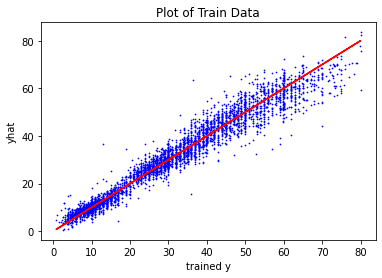

In [6]:
# plotting trained price v/s predicted trained price
plt.scatter(y_train,y1_hat,s=0.5,c='b')
plt.plot(y_train,y_train,c='red')
plt.xlabel('trained y'); plt.ylabel('yhat')
plt.title("Plot of Train Data")

Text(0.5, 1.0, 'Polynomial Regression (with SelectKBest)')

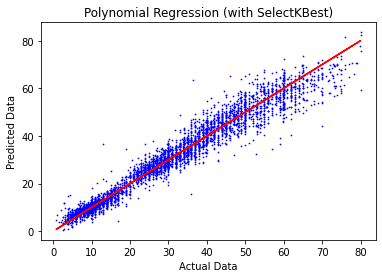

In [8]:
# plotting tested price v/s predicted tested price
plt.scatter(y_test,y1pred,s=0.5,c='b')
plt.plot(y_test,y_test,c='r')
plt.xlabel('Actual Data'); plt.ylabel('Predicted Data')
plt.title("Polynomial Regression (with SelectKBest)")